<a href="https://colab.research.google.com/github/suhashgampa1/OPEN-CV/blob/main/IMG_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

Saving Gemini_Generated_Image_dl0vc2dl0vc2dl0v.png to Gemini_Generated_Image_dl0vc2dl0vc2dl0v.png


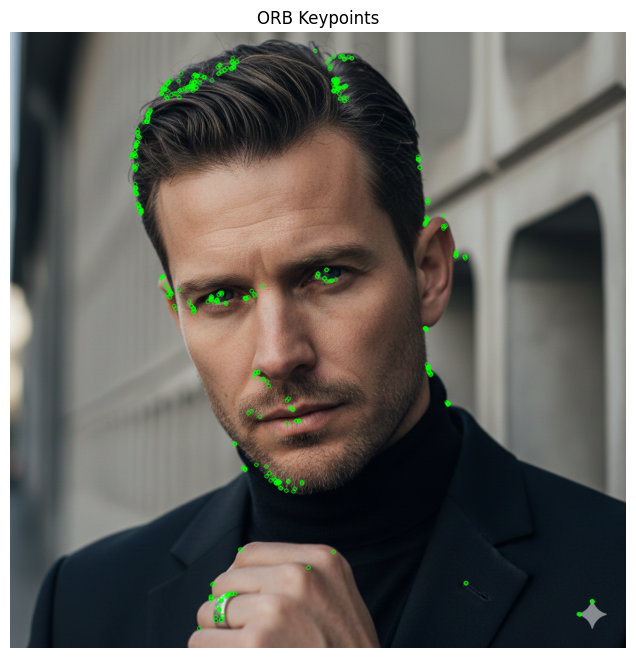

Number of keypoints detected: 500
Descriptor shape: (500, 32)


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Load Open Source Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Step 2: Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Initialize ORB Detector
orb = cv2.ORB_create(nfeatures=500)

# Step 4: Detect Keypoints and Compute Descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Step 5: Draw Keypoints on Image
keypoint_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Step 6: Display Image
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(keypoint_image, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints")
plt.axis("off")
plt.show()

# Optional: Print Descriptor Info
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

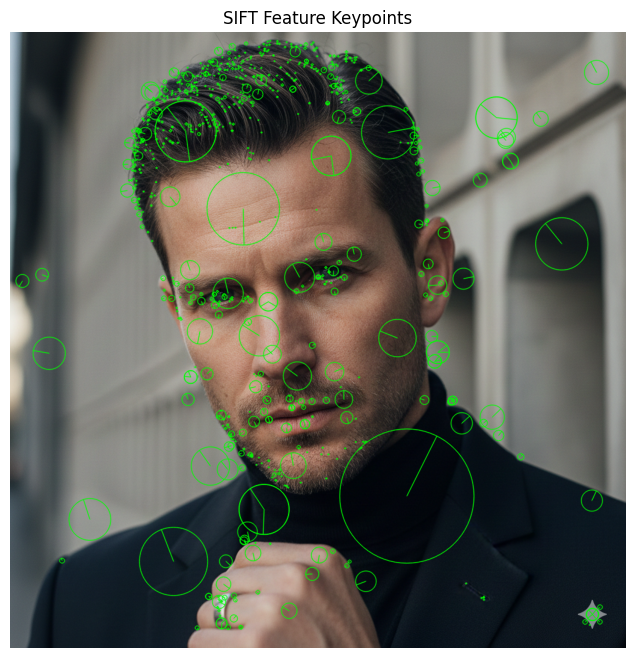

Number of keypoints detected: 779
Descriptor shape: (779, 128)


In [ ]:
sift = cv2.SIFT_create()

# Step 4: Detect Keypoints and Compute Descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Step 5: Draw Keypoints on Image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None,
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
                                         color=(0, 255, 0))

# Step 6: Display Keypoints
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Keypoints")
plt.axis('off')
plt.show()

# Step 7: Print Descriptor Information
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

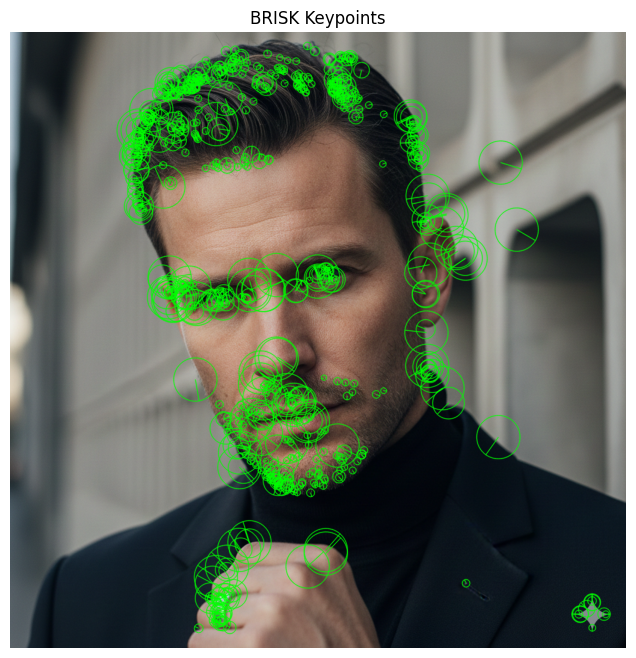

Number of keypoints detected: 651
Descriptor shape: (651, 64)
Sample binary descriptor (first one):
 [240 255 207 225 224 192   1   0 130 134  13 238 248 255 255 119  31 120
 128  33 111 251  55  14 131  97 119 238  57 239  60 227 255 255 223  28
 198  16   1   0   4  60 159  49  51 224   4   0 192 225 114 243 255 183
  33  35 217 124 126  16   0 188 136 169]


In [ ]:
brisk = cv2.BRISK_create()

#  Step 4: Detect Keypoints and Compute Descriptors
keypoints, descriptors = brisk.detectAndCompute(gray, None)

# Step 5: Draw Keypoints
brisk_output = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#  Step 6: Display Image with Keypoints
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(brisk_output, cv2.COLOR_BGR2RGB))
plt.title("BRISK Keypoints")
plt.axis("off")
plt.show()

#  Step 7: Print Descriptor Info
print("Number of keypoints detected:", len(keypoints))
if descriptors is not None:
    print("Descriptor shape:", descriptors.shape)
    print("Sample binary descriptor (first one):\n", descriptors[0])
else:
    print("No descriptors found.")

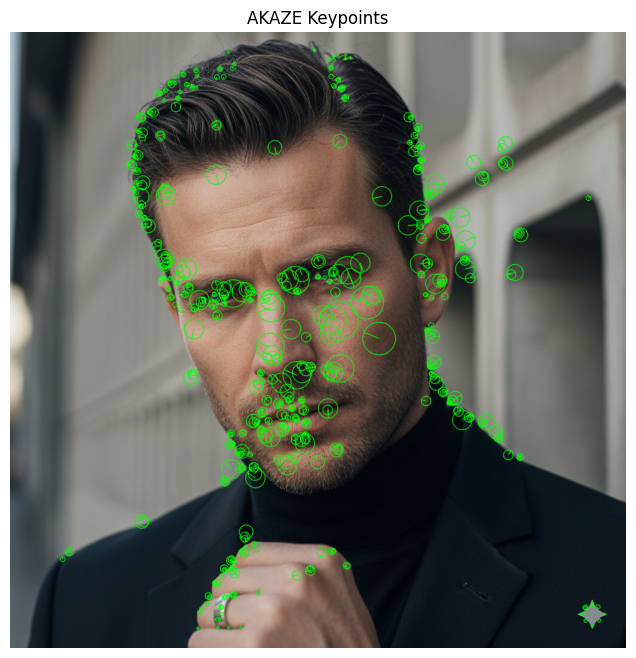

Number of keypoints detected: 525
Descriptor shape: (525, 61)
Sample binary descriptor (first one):
 [ 33 242  12   4 128  17   8 129 101   1 112 190  79  81 234 247  25  96
   0   8   0   0 112 135   1   2   0  28   6   0   7  34 224 187  21   3
  55   9 128   6  12 220   2   0 249 116  97  94 152 143 247  48 241 255
 255 223 207   3   0 255  24]


In [ ]:
akaze = cv2.AKAZE_create()

#  Step 4: Detect Keypoints and Compute Descriptors
keypoints, descriptors = akaze.detectAndCompute(gray, None)

# Step 5: Draw Keypoints
akaze_output = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#  Step 6: Display Image with Keypoints
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(akaze_output, cv2.COLOR_BGR2RGB))
plt.title("AKAZE Keypoints")
plt.axis("off")
plt.show()

#  Step 7: Print Descriptor Info
print("Number of keypoints detected:", len(keypoints))
if descriptors is not None:
    print("Descriptor shape:", descriptors.shape)
    print("Sample binary descriptor (first one):\n", descriptors[0])
else:
    print("No descriptors found.")

In [8]:
import cv2
import numpy as np
import gradio as gr

def match_images(img1, img2):
    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect and compute keypoints & descriptors
    kp1, des1 = akaze.detectAndCompute(gray1, None)
    kp2, des2 = akaze.detectAndCompute(gray2, None)

    if des1 is None or des2 is None:
        return "Could not find descriptors in one or both images."

    # Match using Brute-Force with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top 50 matches
    match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

    # Convert BGR to RGB for display
    match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

    return match_img

# Gradio UI
interface = gr.Interface(
    fn=match_images,
    inputs=[
        gr.Image(type="numpy", label="Upload Image 1"),
        gr.Image(type="numpy", label="Upload Image 2")
    ],
    outputs=gr.Image(type="numpy", label="Matched Keypoints"),
    title="AKAZE Image Matcher",
    description="Upload two images to see matched features using AKAZE."
)

In [9]:
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://28e666c86bdf150362.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Displaying descriptor info and match count

In [12]:
import cv2
import numpy as np
import gradio as gr

def match_images(img1, img2):
    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # AKAZE detector
    akaze = cv2.AKAZE_create()

    # Detect and compute keypoints & descriptors
    kp1, des1 = akaze.detectAndCompute(gray1, None)
    kp2, des2 = akaze.detectAndCompute(gray2, None)

    if des1 is None or des2 is None:
        # Return a tuple of outputs as Gradio expects
        return "Could not find descriptors in one or both images.", "", "", ""

    # Prepare descriptor shape strings
    desc1_shape_str = f"Image 1 Descriptor shape: {des1.shape}"
    desc2_shape_str = f"Image 2 Descriptor shape: {des2.shape}"

    # Match using Brute-Force with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    total_matches_str = f"Total number of matches found: {len(matches)}"

    # Draw top 50 matches
    match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

    # Convert BGR to RGB for display
    match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

    # Return all outputs
    return match_img, desc1_shape_str, desc2_shape_str, total_matches_str

# Gradio UI
interface = gr.Interface(
    fn=match_images,
    inputs=[
        gr.Image(type="numpy", label="Upload Image 1"),
        gr.Image(type="numpy", label="Upload Image 2")
    ],
    outputs=[
        gr.Image(type="numpy", label="Matched Keypoints"),
        gr.Textbox(label="Image 1 Descriptor Info"),
        gr.Textbox(label="Image 2 Descriptor Info"),
        gr.Textbox(label="Match Count")
    ],
    title="AKAZE Image Matcher",
    description="Upload two images to see matched features using AKAZE and view feature details."
)

In [13]:
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c747105daa85f8f87c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
